In [30]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [ ]:
/Users/ruaykd/Desktop/Netology

In [35]:
#Загрузите файл HR.csv в pandas dataframe
import pandas as pd
hr = pd.read_csv('/Users/ruaykd/Desktop/Netology/HR.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [21]:
# Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).
other = ['Work_accident','left','promotion_last_5years','department','salary']
work = []
for d in hr:
    if d in other: pass
    else:
        print(f'\033[1m{d}\033[0m')
        print('count: ', hr[d].count())
        print('min: ', hr[d].min())
        print('median: ', hr[d].median())
        print('mean: ', hr[d].mean())
        print('max: ', hr[d].max())
        print('mode: ', hr[d].mode()[0])
        print('std: ', hr[d].std())
        print('var: ', hr[d].var(),'\n')
        work.append(d)

#OR
# hr.describe(include='all')

satisfaction_level
count:  14999
min:  0.09
median:  0.64
mean:  0.6128335222348166
max:  1.0
mode:  0.1
std:  0.2486306510611418
var:  0.061817200647087255 

last_evaluation
count:  14999
min:  0.36
median:  0.72
mean:  0.7161017401159978
max:  1.0
mode:  0.55
std:  0.17116911062327592
var:  0.02929886443156327 

number_project
count:  14999
min:  2
median:  4.0
mean:  3.80305353690246
max:  7
mode:  4
std:  1.2325923553183857
var:  1.5192839143893255 

average_montly_hours
count:  14999
min:  96
median:  200.0
mean:  201.0503366891126
max:  310
mode:  135
std:  49.943099371284305
var:  2494.313174809979 

time_spend_company
count:  14999
min:  2
median:  3.0
mean:  3.498233215547703
max:  10
mode:  3
std:  1.4601362305354546
var:  2.1319978117222864 



самые скоррелированные: average_monthly_hours + number_projects


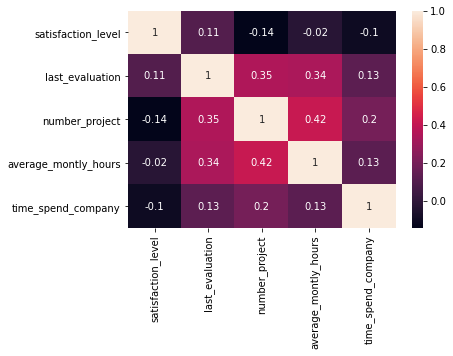

In [27]:
#Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.
import seaborn as sns
sns.heatmap(hr[work].corr(), annot = True)
print('самые скоррелированные: average_monthly_hours + number_projects')
print('наименее скоррелированные: average_montly_hours + satisfaction_level')

In [28]:
#Рассчитайте сколько сотрудников работает в каждомдепартаменте.
hr['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [29]:
#Показать распределение сотрудников по зарплатам.
hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [37]:
#Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности
hr.pivot_table(index = 'department', columns = 'salary', values = 'satisfaction_level', aggfunc = 'count', fill_value = 0, margins=True)

salary,high,low,medium,All
department,,,,
IT,83,609,535,1227
RandD,51,364,372,787
accounting,74,358,335,767
hr,45,335,359,739
management,225,180,225,630
marketing,80,402,376,858
product_mng,68,451,383,902
sales,269,2099,1772,4140
support,141,1146,942,2229


In [46]:
#Проверить гипотезу, что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низкимокладом
import scipy

zero = 0

set1 = hr['average_montly_hours'][hr['salary']=='low']
set2 = hr['average_montly_hours'][hr['salary']=='high']

stats = scipy.stats.ttest_ind(set2, set1, equal_var=False)

print('Среднеее кол-во рабочих часов:\n',
        '\tнищеброды: ',set1.mean(),'\n', 
        '\tбогачи: ',set2.mean())
if (result.pvalue < zero):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Среднеее кол-во рабочих часов:
 	нищеброды:  200.9965828321487 
 	богачи:  199.86742118027485
Не отвергаем нулевую гипотезу


In [53]:
#Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
# Доля сотрудников с повышением за последние 5 лет
left= hr['left'][(hr['promotion_last_5years']==1)&(hr['left']==1)].count()
working = hr['left'][(hr['promotion_last_5years']==1)&(hr['left']==0)].count()
full = hr['department'].count()
print('Доля сотрудников с повышением за последние 5 лет')
print('уволившихся ', round(left/full*100, 2),'%')
print('работающи ', round(working/full*100, 2),'%','\n')

print('Средняя степень удовлетворенности')
print('уволившихся ', round(hr['satisfaction_level'][hr['left']== 1 ].mean(), 2))
print('работающих ', round(hr['satisfaction_level'][hr['left']== 0 ].mean(), 2), '\n')

print('Среднее количество проектов')
print('уволившихся ', round(hr['number_project'][hr['left']== 1 ].mean(), 2))
print('работающих ', round(hr['number_project'][hr['left']== 0 ].mean(), 2))

Доля сотрудников с повышением за последние 5 лет
уволившихся  0.13 %
работающи  2.0 % 

Средняя степень удовлетворенности
уволившихся  0.44
работающих  0.67 

Среднее количество проектов
уволившихся  3.86
работающих  3.79


In [82]:
#Разделить данные на тестовую и обучающую выборкиПостроить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department иsalary)Оценить качество модели на тестовой выборки
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
lda = LinearDiscriminantAnalysis()

analyze = hr.drop(['department','salary','left'], axis = 'columns')
result = hr['left']

X_train, X_test, y_train, y_test = train_test_split(analyze, result, test_size=0.25)
lda.fit(X_train, y_train)
predict = pd.DataFrame([lda.predict(X_test), y_test]).T.sample(15)
print(predict,'\n')
print('accuracy_score',accuracy_score(y_test, lda.predict(X_test)))

print()
K = [(analyze.columns[x], lda.coef_.tolist()[0][x]) for x in range(len(analyze.columns))]
print(*K, lda.intercept_, sep='\n')

      0  1
1024  0  0
721   0  0
3003  0  0
982   0  0
1290  0  0
1294  0  0
303   0  1
2486  0  0
620   0  0
26    0  0
3654  0  0
2580  0  0
1798  1  1
1058  0  0
3579  0  1 

accuracy_score 0.7626666666666667

('satisfaction_level', -4.527166815523061)
('last_evaluation', 0.5859846708992932)
('number_project', -0.2547498278471233)
('average_montly_hours', 0.004767718534748345)
('time_spend_company', 0.2372209830051663)
('Work_accident', -1.0874349689107932)
('promotion_last_5years', -1.0538360733970873)
[0.20275331]
